In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [2]:
df=pd.read_csv('../input/air-quality-data-in-india/city_hour.csv')

In [3]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,497566.000000,347322.000000,524465.000000,524086.000000,512496.000000,373003.000000,547874.000000,510849.000000,513240.000000,476660.000000,422789.000000,207234.000000,511703.000000
mean,71.838052,126.444558,18.123850,29.398540,33.667361,25.379791,2.375267,14.427704,34.615048,3.103311,9.021447,3.256473,175.643854
std,77.765412,108.379947,33.278983,29.849165,41.381755,30.478811,11.667564,20.192064,29.726011,17.150351,22.776452,8.437551,169.247553
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,9.000000
25%,28.380000,56.750000,4.060000,10.940000,11.030000,8.660000,0.430000,4.770000,13.300000,0.060000,0.440000,0.080000,82.000000
50%,49.500000,96.000000,8.230000,20.720000,21.580000,17.060000,0.830000,8.310000,26.140000,0.800000,2.530000,0.670000,123.000000
75%,84.500000,157.300000,16.640000,36.730000,38.500000,31.100000,1.430000,15.070000,47.340000,2.560000,8.270000,3.100000,226.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628457 entries, 0 to 628456
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        628457 non-null  object 
 1   Datetime    628457 non-null  object 
 2   PM2.5       497566 non-null  float64
 3   PM10        347322 non-null  float64
 4   NO          524465 non-null  float64
 5   NO2         524086 non-null  float64
 6   NOx         512496 non-null  float64
 7   NH3         373003 non-null  float64
 8   CO          547874 non-null  float64
 9   SO2         510849 non-null  float64
 10  O3          513240 non-null  float64
 11  Benzene     476660 non-null  float64
 12  Toluene     422789 non-null  float64
 13  Xylene      207234 non-null  float64
 14  AQI         511703 non-null  float64
 15  AQI_Bucket  511703 non-null  object 
dtypes: float64(13), object(3)
memory usage: 76.7+ MB


In [6]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         130891
PM10          281135
NO            103992
NO2           104371
NOx           115961
NH3           255454
CO             80583
SO2           117608
O3            115217
Benzene       151797
Toluene       205668
Xylene        421223
AQI           116754
AQI_Bucket    116754
dtype: int64

In [7]:
df.dropna(how="any",inplace=True)

In [8]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000
mean,70.631090,137.311825,19.549226,33.179634,36.389073,24.661116,1.109183,11.150031,35.859545,3.911974,12.183866,2.445509,156.693017
std,67.740039,105.861094,30.932574,22.587312,37.936910,19.272425,1.768518,9.953966,25.981319,6.473897,16.643653,5.716084,104.364273
min,0.030000,1.000000,0.010000,0.130000,0.000000,0.010000,0.000000,0.010000,0.030000,0.000000,0.000000,0.000000,20.000000
25%,29.790000,67.100000,3.740000,15.620000,14.100000,11.440000,0.430000,5.640000,17.660000,0.680000,2.110000,0.150000,82.000000
50%,52.310000,107.750000,9.160000,28.000000,23.965000,18.940000,0.700000,8.930000,28.460000,1.930000,5.870000,0.790000,123.000000
75%,82.500000,170.900000,18.740000,44.960000,42.900000,33.320000,1.110000,13.540000,47.390000,4.250000,15.480000,2.370000,204.000000
max,999.990000,1000.000000,365.270000,264.110000,398.070000,485.520000,31.620000,199.930000,219.780000,120.080000,169.300000,261.950000,760.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97644 entries, 47960 to 576634
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        97644 non-null  object 
 1   Datetime    97644 non-null  object 
 2   PM2.5       97644 non-null  float64
 3   PM10        97644 non-null  float64
 4   NO          97644 non-null  float64
 5   NO2         97644 non-null  float64
 6   NOx         97644 non-null  float64
 7   NH3         97644 non-null  float64
 8   CO          97644 non-null  float64
 9   SO2         97644 non-null  float64
 10  O3          97644 non-null  float64
 11  Benzene     97644 non-null  float64
 12  Toluene     97644 non-null  float64
 13  Xylene      97644 non-null  float64
 14  AQI         97644 non-null  float64
 15  AQI_Bucket  97644 non-null  object 
dtypes: float64(13), object(3)
memory usage: 12.7+ MB


In [10]:
#df

In [11]:
df["City"].unique()

array(['Amaravati', 'Amritsar', 'Chandigarh', 'Delhi', 'Gurugram',
       'Hyderabad', 'Kolkata', 'Patna'], dtype=object)

In [12]:
df['Datetime'].unique()

array(['2017-11-25 09:00:00', '2017-11-25 10:00:00',
       '2017-11-25 11:00:00', ..., '2018-06-26 11:00:00',
       '2018-06-26 12:00:00', '2018-06-26 13:00:00'], dtype=object)

In [13]:
#sns.pairplot(df,hue="AQI_Bucket",vars=['PM2.5','PM10','NO','Benzene'],palette='husl')

In [14]:
a=pd.get_dummies(df['City'],drop_first=True)

In [15]:
a.describe()

,Amritsar,Chandigarh,Delhi,Gurugram,Hyderabad,Kolkata,Patna
count,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000
mean,0.115348,0.043771,0.282608,0.013795,0.365491,0.080804,0.031523
std,0.319443,0.204587,0.450270,0.116640,0.481570,0.272535,0.174726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#type(df['City'])

In [17]:
#df.iloc[:3]

In [18]:
#pd.get_dummies(data=df,columns=['City','Datetime'])

In [19]:
#df.info()

In [20]:
df=df.drop('Datetime',axis=1)

In [21]:
df=pd.get_dummies(data=df,columns=['City'])

In [22]:
#df.head()

In [23]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Xylene,AQI,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna
count,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,...,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000,97644.000000
mean,70.631090,137.311825,19.549226,33.179634,36.389073,24.661116,1.109183,11.150031,35.859545,3.911974,...,2.445509,156.693017,0.066661,0.115348,0.043771,0.282608,0.013795,0.365491,0.080804,0.031523
std,67.740039,105.861094,30.932574,22.587312,37.936910,19.272425,1.768518,9.953966,25.981319,6.473897,...,5.716084,104.364273,0.249434,0.319443,0.204587,0.450270,0.116640,0.481570,0.272535,0.174726
min,0.030000,1.000000,0.010000,0.130000,0.000000,0.010000,0.000000,0.010000,0.030000,0.000000,...,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.790000,67.100000,3.740000,15.620000,14.100000,11.440000,0.430000,5.640000,17.660000,0.680000,...,0.150000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.310000,107.750000,9.160000,28.000000,23.965000,18.940000,0.700000,8.930000,28.460000,1.930000,...,0.790000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82.500000,170.900000,18.740000,44.960000,42.900000,33.320000,1.110000,13.540000,47.390000,4.250000,...,2.370000,204.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,999.990000,1000.000000,365.270000,264.110000,398.070000,485.520000,31.620000,199.930000,219.780000,120.080000,...,261.950000,760.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


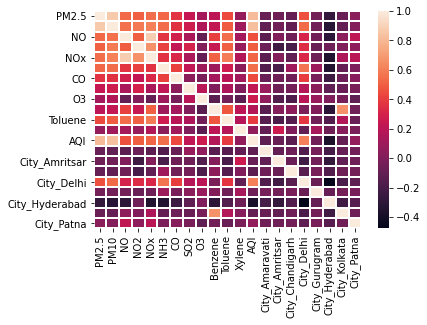

In [24]:
sns.heatmap(df.corr(),linewidths=1)

In [25]:
# in this we can see that AQI is highly correlated with PM 2.5 and PM 10

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97644 entries, 47960 to 576634
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PM2.5            97644 non-null  float64
 1   PM10             97644 non-null  float64
 2   NO               97644 non-null  float64
 3   NO2              97644 non-null  float64
 4   NOx              97644 non-null  float64
 5   NH3              97644 non-null  float64
 6   CO               97644 non-null  float64
 7   SO2              97644 non-null  float64
 8   O3               97644 non-null  float64
 9   Benzene          97644 non-null  float64
 10  Toluene          97644 non-null  float64
 11  Xylene           97644 non-null  float64
 12  AQI              97644 non-null  float64
 13  AQI_Bucket       97644 non-null  object 
 14  City_Amaravati   97644 non-null  uint8  
 15  City_Amritsar    97644 non-null  uint8  
 16  City_Chandigarh  97644 non-null  uint8  
 17  City_De

In [27]:
#x=df.drop(["AQI_Bucket","AQI","City_Amaravati","City_Amritsar","City_Chandigarh","City_Delhi","City_Gurugram","City_Hyderabad","City_Kolkata","City_Patna","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"],axis=1)

In [28]:
#y=df["AQI_Bucket"]

In [29]:
#model=LogisticRegression()

In [30]:
#model.fit(x_train,y_train)

In [31]:
#predictions=model.predict(x_test)

In [32]:
#print(confusion_matrix(y_test, predictions))
#print(accuracy_score(y_test, predictions))

In [33]:
x=df.drop(['AQI_Bucket'],axis=1)
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,Xylene,AQI,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna
47960,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,...,0.23,155.0,1,0,0,0,0,0,0,0
47961,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,...,0.15,159.0,1,0,0,0,0,0,0,0
47962,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,...,0.08,173.0,1,0,0,0,0,0,0,0
47965,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,...,0.00,191.0,1,0,0,0,0,0,0,0
47966,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,...,0.00,191.0,1,0,0,0,0,0,0,0


In [34]:
y=df.iloc[:,13]
y.head()
y.unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [35]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]  
}

In [36]:
grid_size_per_parameter  = [len(i) for i in params.values()]
print(grid_size_per_parameter)
np.prod(grid_size_per_parameter)

[6, 8, 4, 5, 4]


3840

In [37]:
classifier =xgb.XGBClassifier()

In [38]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [39]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,...,AQI,AQI_Bucket,City_Amaravati,City_Amritsar,City_Chandigarh,City_Delhi,City_Gurugram,City_Hyderabad,City_Kolkata,City_Patna
47960,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,...,155.0,Moderate,1,0,0,0,0,0,0,0
47961,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,...,159.0,Moderate,1,0,0,0,0,0,0,0
47962,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,...,173.0,Moderate,1,0,0,0,0,0,0,0
47965,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,...,191.0,Moderate,1,0,0,0,0,0,0,0
47966,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,...,191.0,Moderate,1,0,0,0,0,0,0,0


In [40]:
type(random_search)

sklearn.model_selection._search.RandomizedSearchCV

In [41]:
#df.info()

In [42]:
random_search.estimator

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [44]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [46]:
#random_search.best_params_

In [47]:
classifier=xgb.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [48]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_test,y_test,cv=10)

In [49]:
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
score.mean()*100

100.0

In [51]:
score.std()*100

0.0

**I'm just a Beginner
It's just for testing XGBClassifier algorithm, to analyse how it works;**
# recommendation are most welcomed
